In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess


# <font face="gotham" color="purple"> ARMA And ARIMA </font>

We have introduced $\text{AR}$ and $\text{MA}$ models in previous chapters, here we will continue to introduce other two common models: $\text{ARMA}$ and $\text{ARMIA}$.

An $\text{ARMA}(1,1)$ process is a combination of $\text{AR}$ and $\text{MA}$
$$
Y_{t}=\phi_0+\phi_{1} Y_{t-1}+\theta_{0} u_{t}+\theta_{1} u_{t-1}
$$

In general, $\text{ARMA}(p,q)$ process has the form
$$
Y_t = \phi_0 + \sum_{i=1}^pY_{t-i}+\sum_{i=1}^q\theta_i u_{t-i}
$$

And $\text{ARIMA}$ model is essentially the same as $\text{ARMA}$, if we have to difference a series $d$ times to render it stationary then apply the $\text{ARIMA}$ model, we say that the original time series is $\text{ARIMA}(p,d,q)$. 

With the same token, $\text{ARIMA}(p,0,q)$ process is the same as $\text{ARMA}(p,q)$.

# <font face="gotham" color="purple"> The Box-Jenkins Methodology </font>

With so many options at hands, what model to apply to a time series? This is where **Box-Jenkins Methodology** kick in, which provides a systematic method of **identifying**, **estimating** and **checking** with $\text{ARIMA}$ models. 

## <font face="gotham" color="purple"> ACF VS PACF </font>

Before discussion of $\text{ARIMA}$ identification, we should understand the difference of **autocorrelation function** (ACF) and **partial autocorrelation function** (PACF), which both are important tools for identifying lags of $\text{ARIMA}$.

We have shown that the formula of sample ACF
\begin{aligned}
&\hat{\gamma}_{k}=\frac{\sum\left(Y_{t}-\bar{Y}\right)\left(Y_{t+k}-\bar{Y}\right)}{n-k} \\
&\hat{\gamma}_{0}=\frac{\sum\left(Y_{t}-\bar{Y}\right)^{2}}{n-1}\\
&\hat{\rho}_{k} =\frac{\hat{\gamma}_{k}}{\hat{\gamma}_{0}}=\frac{\text { covariance at lag } k}{\text { variance }}
\end{aligned}

However, PACF doesn't have a formula. Simply speaking, PACF requires removing all correlations in between. e.g. if you are measuring variables $k$ periods apart, then all influences from other variables in period $<k$ should be eliminated.

Regression with demeaned variables can give us the partial autocorrelation, e.g. 
$$
y_t-\bar{y}=\phi_{21} (y_{t-1}-\bar{y})+\phi_{22} (y_{t-2}-\bar{y})+\phi_{33} (y_{t-3}-\bar{y})+u_{t}
$$
Estimates of $\phi_{kk}$ is the partial correlation at lag $3$.

So how to use ACF and PACF to identify the lags of $\text{ARMA}$ model? First we transform the original data into log difference, then plot both correlograms. 

In [3]:
start = dt.datetime(1980, 1, 1)
end = dt.datetime(2021,10, 1)
df_cpi = pdr.data.DataReader(['CPIAUCSL'], 'fred' , start, end)
df_cpi.columns = ['urban_CPI']
df_cpi = df_cpi.dropna()

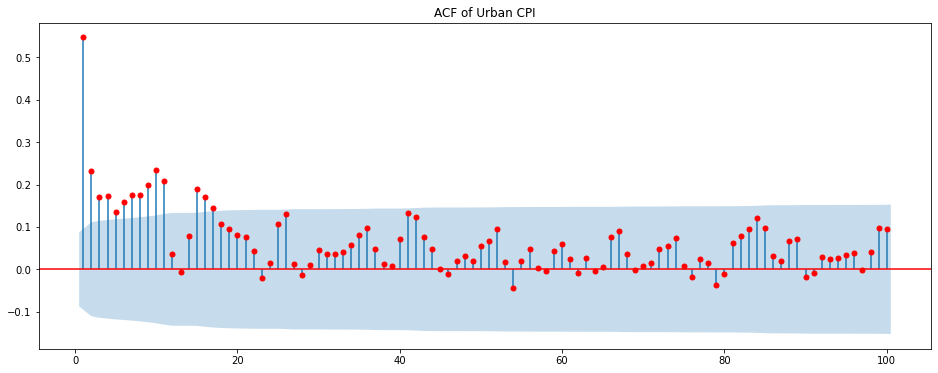

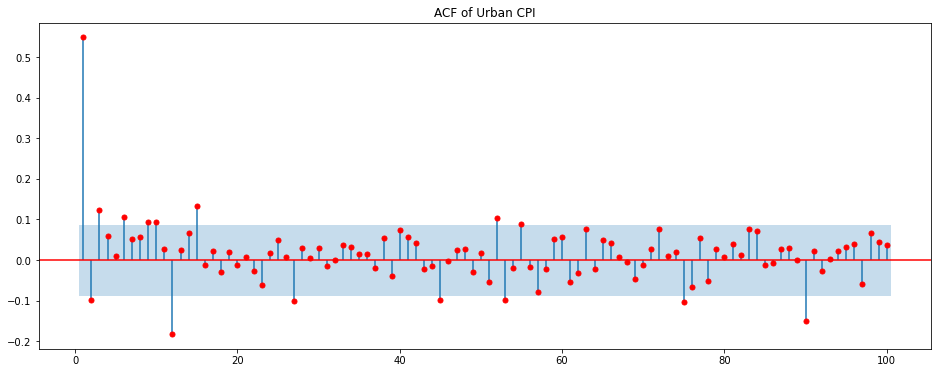

In [17]:
plot_acf(np.log(df_cpi).diff().dropna(), 
         lags=100, color = 'red', zero = False, 
         title ='ACF of Urban CPI').set_size_inches(16,6)
plot_pacf(np.log(df_cpi).diff().dropna(), 
          lags=100, color = 'red', zero = False, 
          title ='ACF of Urban CPI').set_size_inches(16,6)

## <font face="gotham" color="purple"> Simulation of ACF and PACF </font>

In [88]:
arparams = np.array([[.63, -.5],
                     [-.8, .7]])
maparams = np.array([[.58, .45],
                     [.1, . 3]])

In [93]:
for i in range(arparams.shape[0]):
    ar = np.r_[1, -arparams[i]]
    ma = np.r_[1, maparams[i]]
    arma22 = ArmaProcess(arparams, maparams).generate_sample(nsample=500)
    

0
1


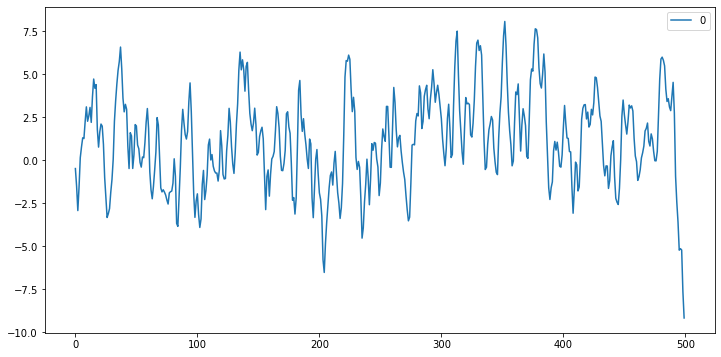

In [87]:
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]
arma22 = ArmaProcess(arparams, maparams).generate_sample(nsample=500)
pd.DataFrame(arma22).plot(figsize=(12, 6), label = 'Simulation'); plt.show()

$$
\left(1-\phi_{1}L-\ldots-\phi_{p}L^{p}\right)y_{t} =
        \left(1+\theta_{1}L+\ldots+\theta_{q}L^{q}\right)\epsilon_{t}
$$

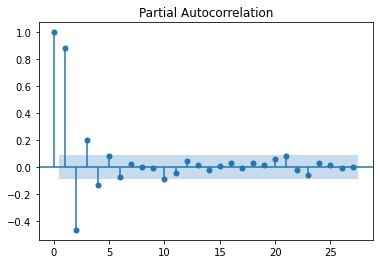

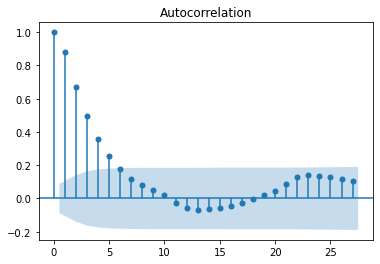

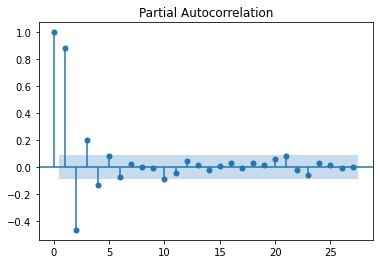

In [91]:
plot_acf(arma22)
plot_pacf(arma22)

In [28]:
ArmaProcess?

Init signature: ArmaProcess(ar=None, ma=None, nobs=100)
Docstring:     
Theoretical properties of an ARMA process for specified lag-polynomials.

Parameters
----------
ar : array_like
    Coefficient for autoregressive lag polynomial, including zero lag.
    Must be entered using the signs from the lag polynomial representation.
    See the notes for more information about the sign.
ma : array_like
    Coefficient for moving-average lag polynomial, including zero lag.
nobs : int, optional
    Length of simulated time series. Used, for example, if a sample is
    generated. See example.

Notes
-----
Both the AR and MA components must include the coefficient on the
zero-lag. In almost all cases these values should be 1. Further, due to
using the lag-polynomial representation, the AR parameters should
have the opposite sign of what one would write in the ARMA representation.
See the examples below.

The ARMA(p,q) process is described by

.. math::

    y_{t}=\phi_{1}y_{t-1}+\ldots+\phi_{p